In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, quad_func, binning as bn, tools_qrec
from matplotlib.pyplot import *

In [2]:
p0 = prjlib.init_analysis(wtype='Lmask',fltr='cinv')
p1 = prjlib.init_analysis(wtype='Lmask',fltr='cinv',dtype='dr2_nilc')
p2 = prjlib.init_analysis(wtype='G60Lmask',fltr='cinv')
p3 = prjlib.init_analysis(wtype='LmaskDR3',fltr='cinv',dtype='dr3_nosz')
p4 = prjlib.init_analysis(wtype='LmaskN18',fltr='none',dtype='dr2_nilc')
#qtau1, qlen1, qsrc1, qtbh1, qtBH1 = tools_qrec.init_quad(p1.ids,p1.stag,rlmin=100,rlmax=2048)
qtau0, __, __, qtbh0, qtBH0 = tools_qrec.init_quad(p0.ids,p0.stag,mfmax=100,n0max=50,rlmin=100,rlmax=2048)
qtau1, __, __, qtbh1, qtBH1 = tools_qrec.init_quad(p1.ids,p1.stag,mfmax=100,n0max=50,rlmin=100,rlmax=2048)
qtau2, __, __, qtbh2, qtBH2 = tools_qrec.init_quad(p2.ids,p2.stag,mfmax=100,n0max=50,rlmin=100,rlmax=2048)
qtau3, __, __, qtbh3, qtBH3 = tools_qrec.init_quad(p3.ids,p3.stag,mfmax=100,n0max=50,rlmin=100,rlmax=2048)
qtau4, __, __, qtbh4, qtBH4 = tools_qrec.init_quad(p4.ids,p4.stag,mfmax=100,n0max=50,rlmin=100,rlmax=2048)

### Normalization

#### Comparison in terms of filtering

In [3]:
#for qobj in [qtbh0,qtBH0,qtbh1,qtBH1]:
#    al = (np.loadtxt(qobj.f['TT'].al)).T[1]
#    n0 = (np.loadtxt(qobj.f['TT'].n0bs)).T[1]
#    pl.plot_1dstyle(fsize=[10,3],ymin=1e-7,ymax=3e-6,xmin=1,xmax=2048)
#    plot(qobj.l,al,'k--')
#    plot(qobj.l,n0,'k-')
#    show()

#### Mean-field spectrum, raw spectrum and RDN0

In [4]:
#for qobj in [qtau0,qtau1,qtau4]: 
#for qobj in [qtau0,qtau1,qtau2,qtau3]:
#for qobj in [qtBH0,qtBH1,qtBH2]: 
#for qobj in [qtbh0,qtBH0,qtbh1,qtBH1]: 
#    ml = (np.loadtxt(qobj.f['TT'].ml[0])).T[1]
#    cl = (np.loadtxt(qobj.f['TT'].cl[0])).T[1]
#    sl = np.mean( np.array( [ (np.loadtxt(qobj.f['TT'].cl[i])).T[1] for i in range(1,10) ] ), axis=0 )
#    n0 = (np.loadtxt(qobj.f['TT'].n0bs)).T[1]
#    rd = (np.loadtxt(qobj.f['TT'].rdn0[0])).T[1]
#    pl.plot_1dstyle(fsize=[10,3],ymin=1e-7,ymax=5e-5,xmin=1,xmax=100,ylog=True)
#    plot(qobj.l,cl-n0/(qobj.mfsim),'r',label='real')
#    plot(qobj.l,ml,'b',label='mean-field')
#    plot(qobj.l,sl-n0/(qobj.mfsim-1),'k--',label='sim')
#    plot(qobj.l,rd,'g--',label='rdn0')
#    legend()
#    show()

#### Cross with input

#### Debiased spectrum

[0.00000000e+00 3.08374768e-06 1.90335679e-06 ... 1.44011550e-08
 1.44836562e-08 1.45664679e-08]


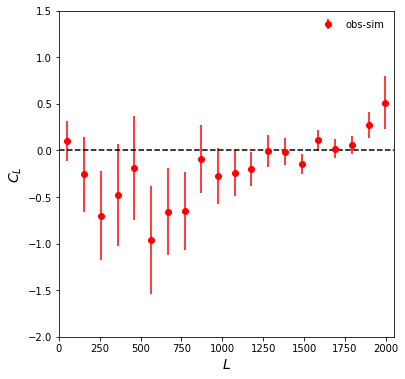

[0.00000000e+00 3.05620707e-06 1.88339220e-06 ... 1.42981097e-08
 1.43799746e-08 1.44621862e-08]


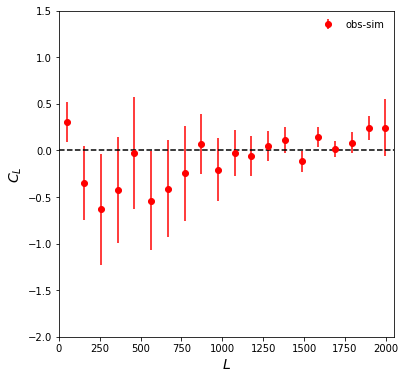

[0.00000000e+00 3.07180417e-06 1.89512328e-06 ... 1.43392192e-08
 1.44213753e-08 1.45037959e-08]


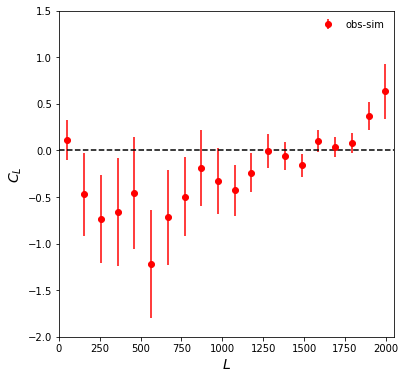

[0.00000000e+00 3.17990019e-06 1.97231982e-06 ... 1.46588400e-08
 1.47427210e-08 1.48269911e-08]


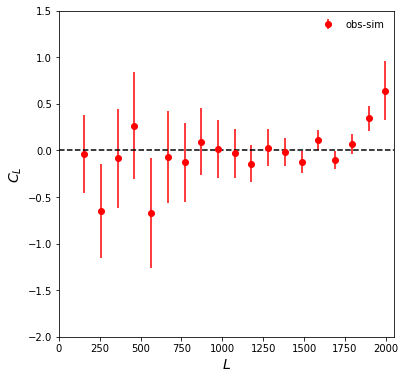

In [5]:
mb = bn.multipole_binning(20,lmin=1,lmax=2048)
s  = mb.bc * 1e5
#for qobj in [qtau0,qtau1,qtau4]:
for qobj in [qtBH0,qtBH1,qtBH2,qtBH3]:
    al = (np.loadtxt(qobj.f['TT'].al)).T[1]
    vl = al/np.sqrt(qobj.l+1e-30)
    sb, vb, ci, ob = bn.binned_spec(mb,qobj.f['TT'].cl,cn=1,doreal=True,opt=True,vl=vl)
    n0 = (np.loadtxt(qobj.f['TT'].n0bs)).T[1]
    nb = bn.binning(n0,mb,vl=vl)
    if qobj in [qtau0,qtau1,qtau2,qtau3,qtau4]:
        rd = (np.loadtxt(qobj.f['TT'].rdn0[0])).T[1]
        rb = bn.binning(rd,mb,vl=vl)
        sb = sb - nb - nb/(qobj.mfsim-1)
        ob = ob - rb - nb/(qobj.mfsim)
    else:
        rd = np.array( [ (np.loadtxt(qobj.f['TT'].rdn0[i])).T[1] for i in p0.rlz ] )
        rb = bn.binning(rd,mb,vl=vl)
        ci = ci - rb[1:,:] - nb/(qobj.mfsim-1)
        sb = np.mean(ci,axis=0)
        vb = np.std(ci,axis=0)
        ob = ob - rb[0] - nb/(qobj.mfsim)
    pl.plot_1dstyle(fsize=[6,6],ymin=-2,ymax=1.5,xmin=1,xmax=2048)
    errorbar(mb.bc,s*(ob-sb),color='r',yerr=s*vb,label='obs-sim',fmt='o')
    axhline(0,color='k',ls='--')
    legend()
    show()